In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train,-1) / 255.
x_test = np.expand_dims(x_test,-1) / 255.

Using TensorFlow backend.


In [2]:
from keras.layers import Input, BatchNormalization, Activation, Conv2DTranspose
from keras.layers import SeparableConv2D as Conv2D
from keras.models import Model

nb_channels = 1

x = h = Input((28,28,1))

h = Conv2D(nb_channels,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = Activation('relu')(h)

nb_channels = nb_channels * 2

h = Conv2D(nb_channels,(3,3),strides=2,padding='same')(h)
h = BatchNormalization()(h)
h = Activation('relu')(h)

h = Conv2D(nb_channels,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = Activation('relu')(h)

nb_channels = nb_channels * 2

h = Conv2D(nb_channels,(3,3),strides=2,padding='same')(h)
h = BatchNormalization()(h)
h = Activation('relu')(h)

h = Conv2D(nb_channels,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = Activation('relu')(h)

nb_channels = nb_channels // 2

h = Conv2DTranspose(nb_channels,(3,3),strides=2,padding='same')(h)
h = BatchNormalization()(h)
h = Activation('relu')(h)

h = Conv2D(nb_channels,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = Activation('relu')(h)

nb_channels = nb_channels // 2

h = Conv2DTranspose(nb_channels,(3,3),strides=2,padding='same')(h)
h = BatchNormalization()(h)
h = Activation('relu')(h)

h = Conv2D(1,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = Activation('sigmoid')(h)

y = h

ae = Model(x,y)
ae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 28, 28, 1)         11        
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 1)         0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 14, 14, 2)         13        
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 2)         8         
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 2)         0         
__________

In [3]:
ae.compile(loss='mse', optimizer='adam')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [4]:
hist = ae.fit(
    x=x_train,
    y=x_train,
    validation_split=0.1,
    epochs=5,
    verbose=0,
)

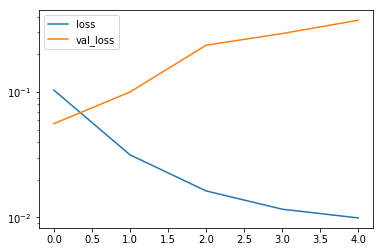

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.yscale('log')

In [6]:
def show(x,ae):
    pred = ae.predict(x[:100])

    plt.figure(figsize=(15,30))

    nb = 0
    for i in range(100):
        nb += 1
        plt.subplot(20,10,nb)
        plt.imshow(x[i,:,:,0], 'Blues')
        plt.axis('off')
        plt.clim(0,1)

        nb += 1
        plt.subplot(20,10,nb)
        plt.imshow(pred[i,:,:,0], 'Blues')
        plt.axis('off')
        plt.clim(0,1)

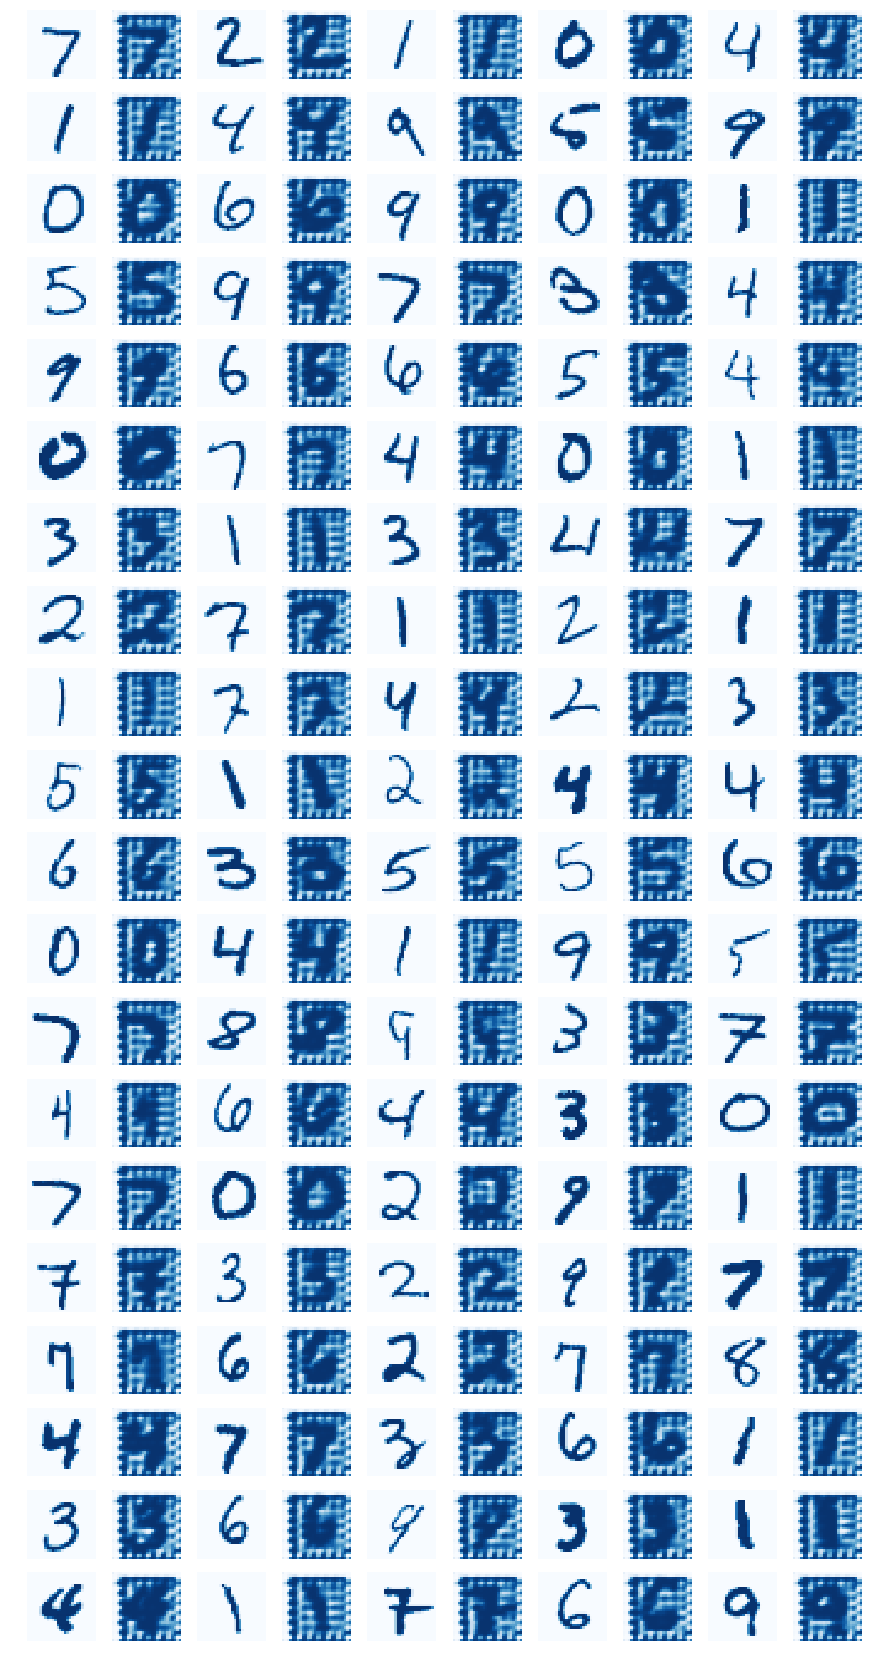

In [7]:
show(x_test[:100],ae)

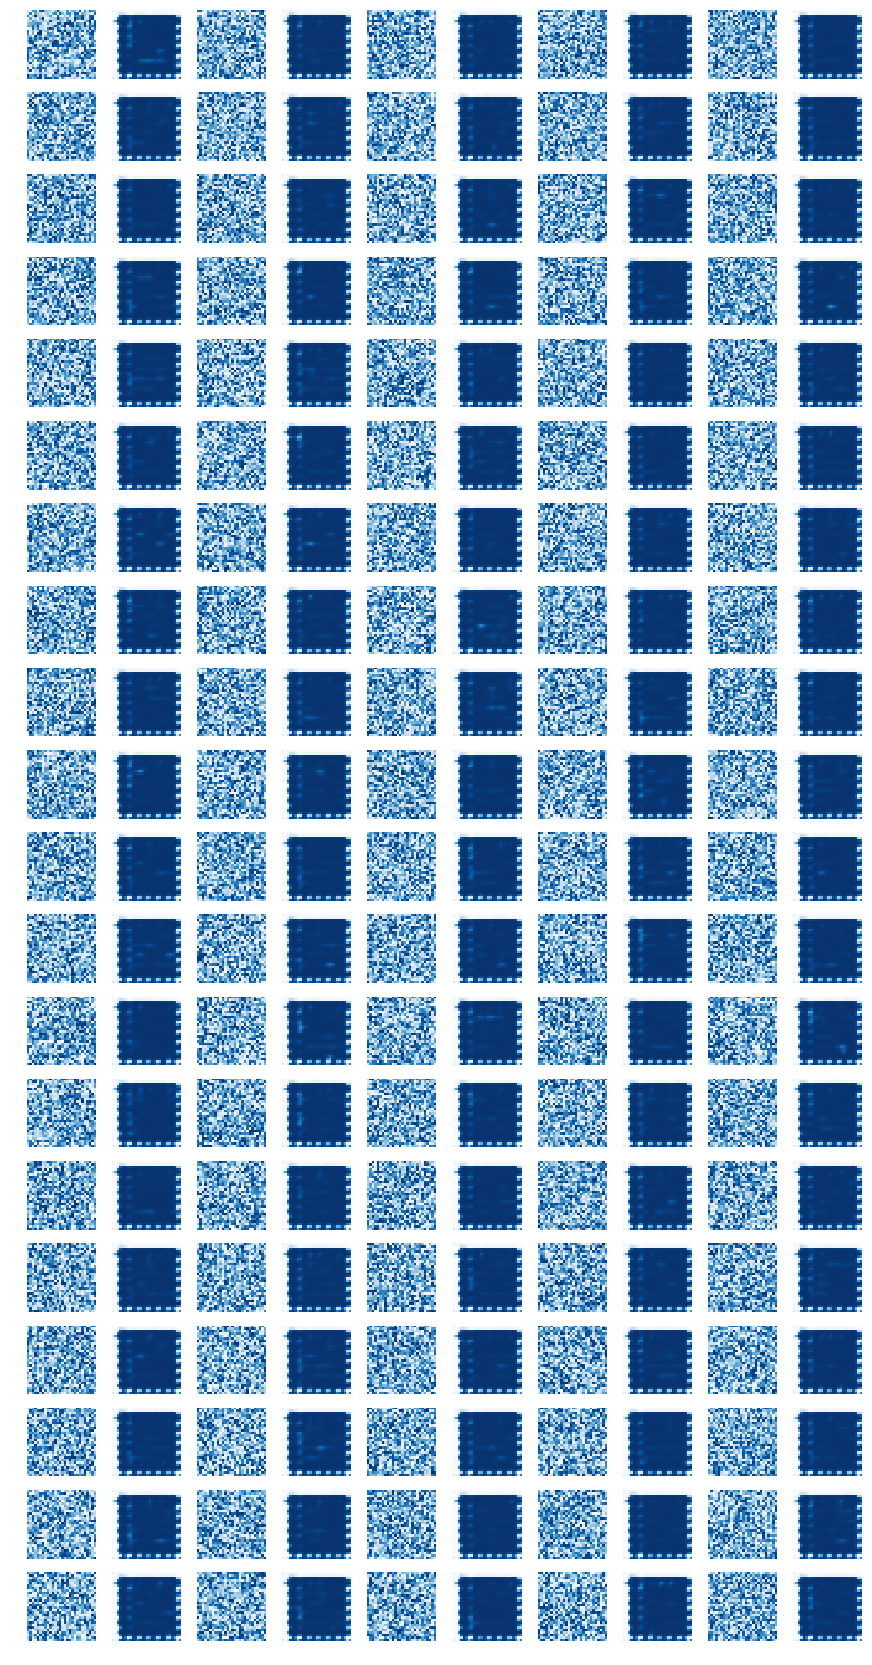

In [8]:
show(np.random.random((100,28,28,1)),ae)

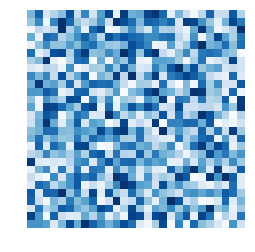

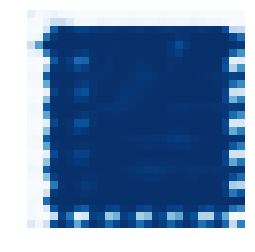

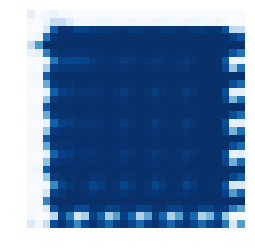

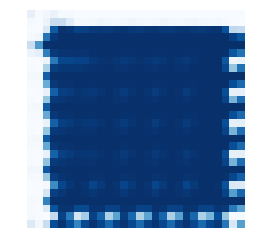

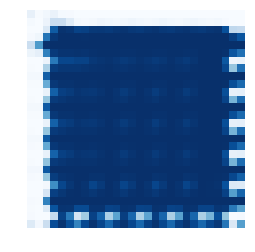

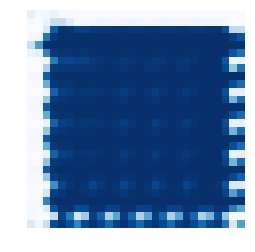

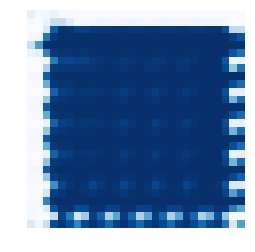

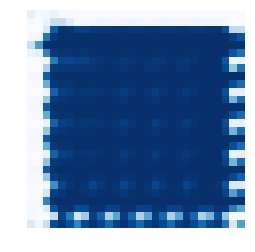

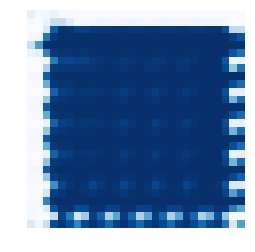

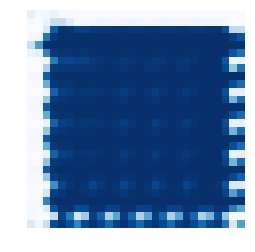

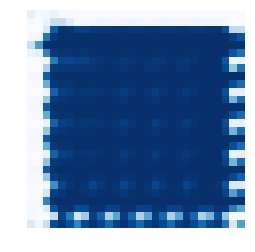

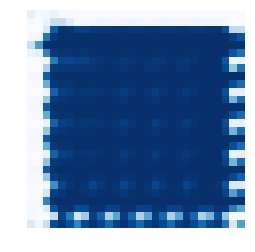

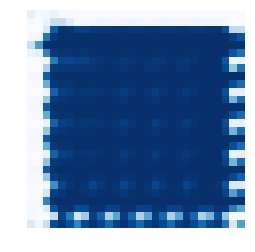

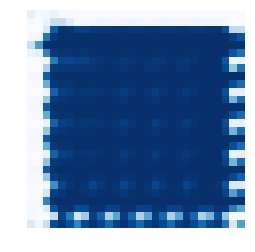

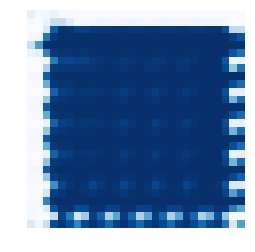

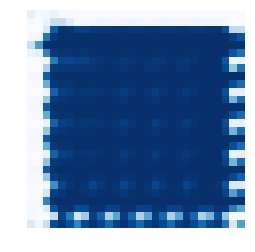

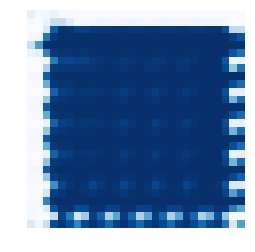

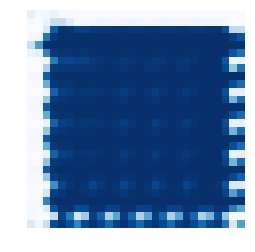

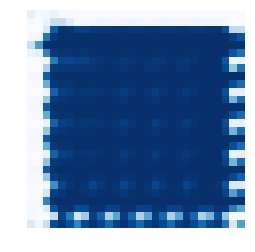

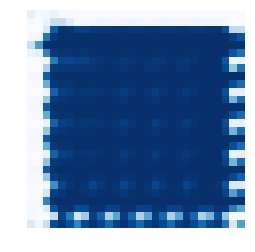

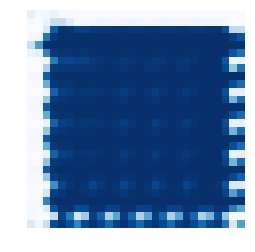

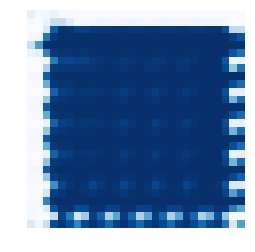

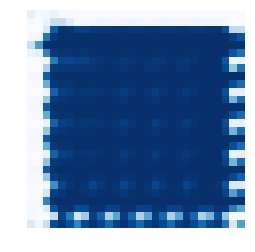

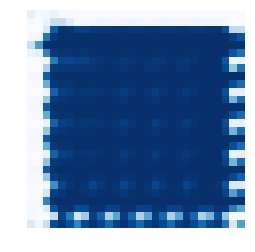

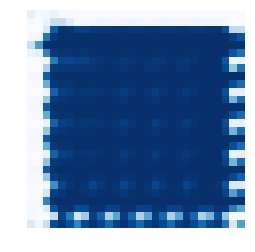

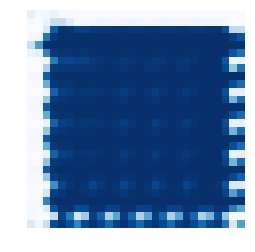

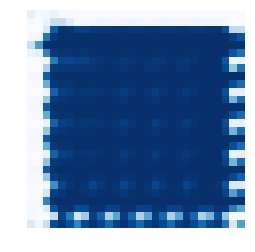

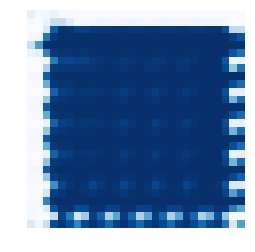

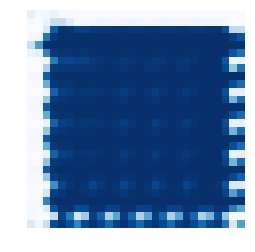

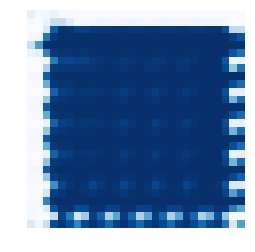

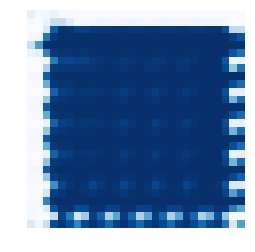

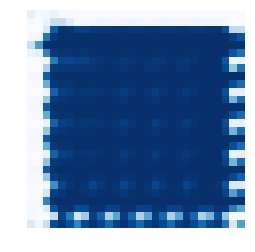

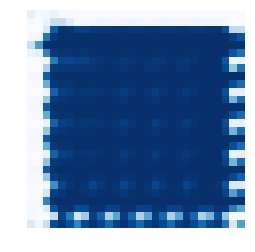

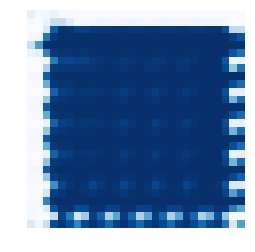

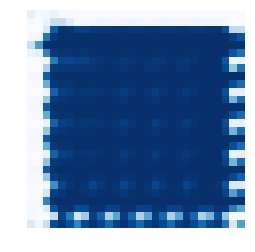

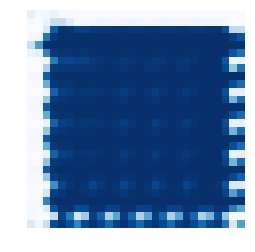

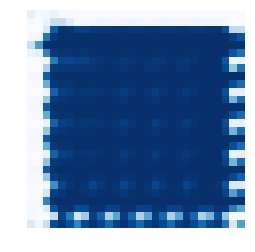

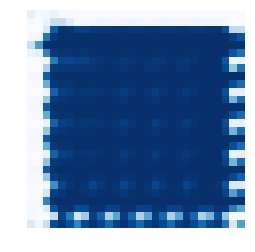

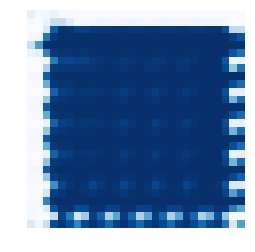

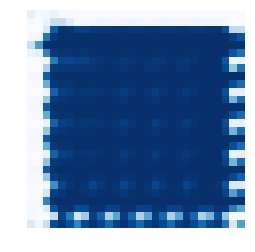

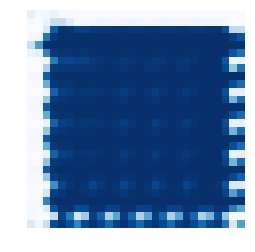

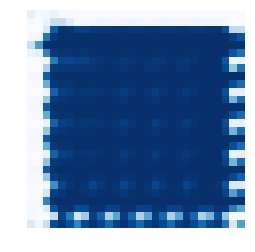

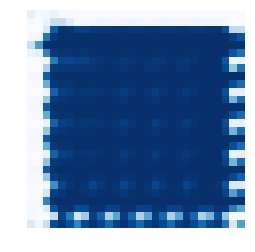

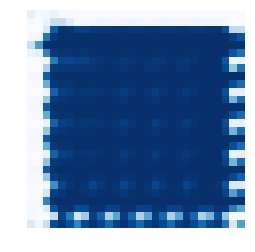

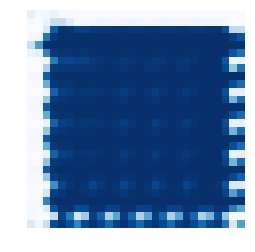

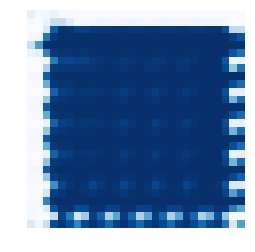

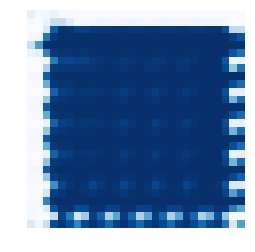

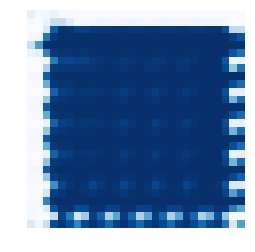

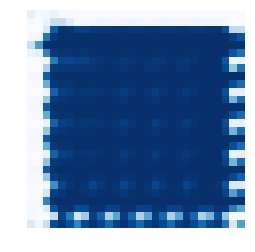

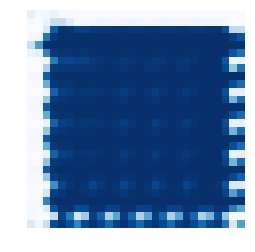

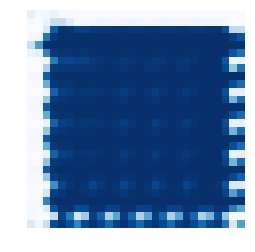

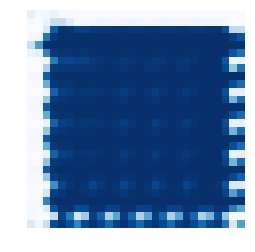

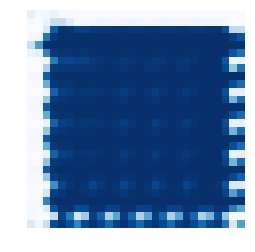

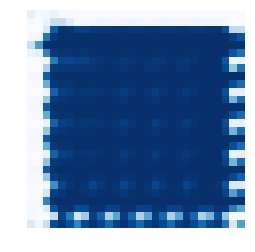

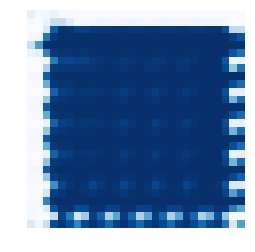

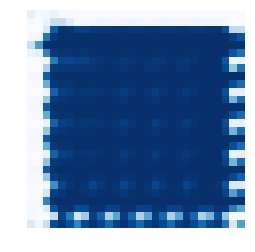

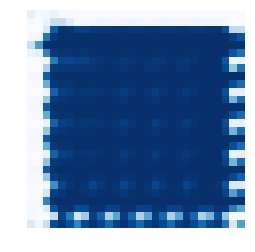

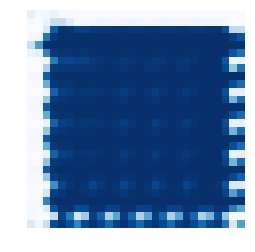

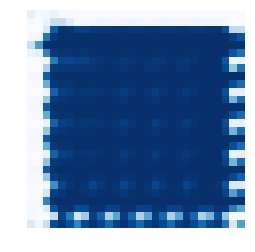

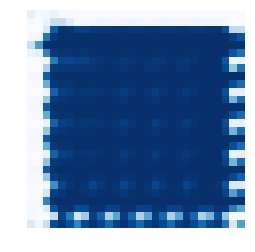

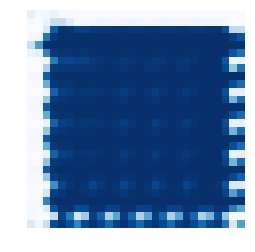

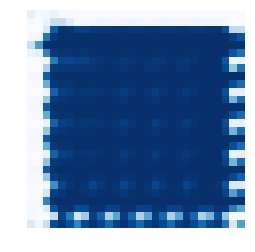

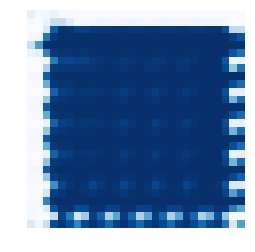

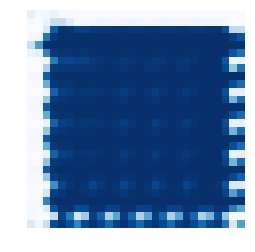

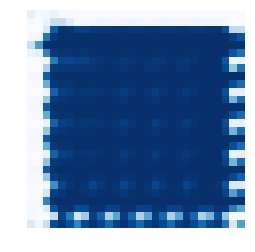

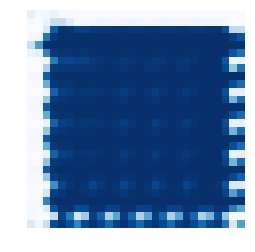

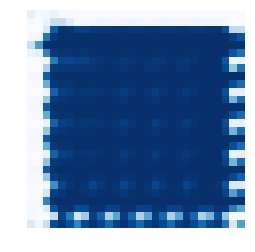

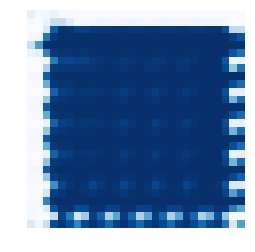

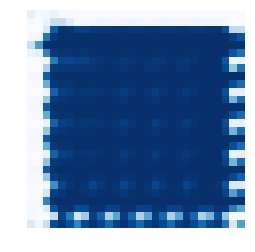

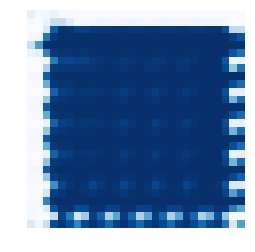

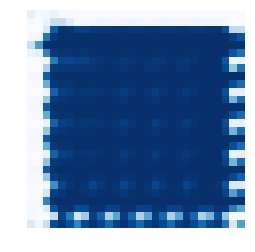

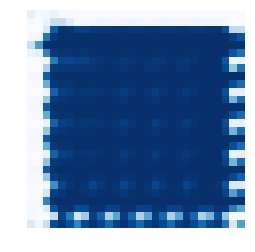

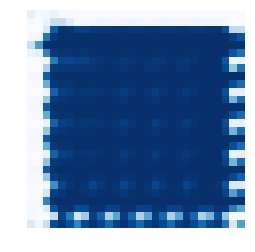

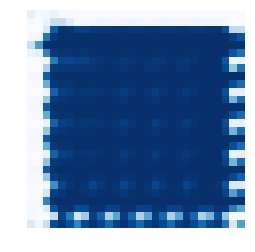

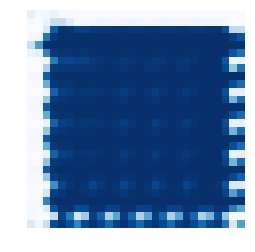

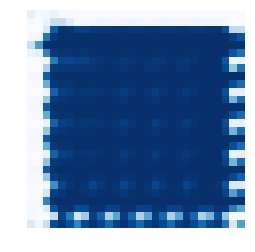

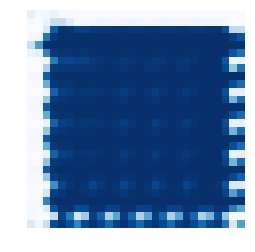

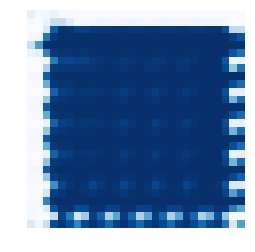

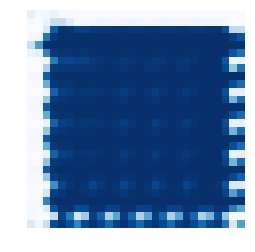

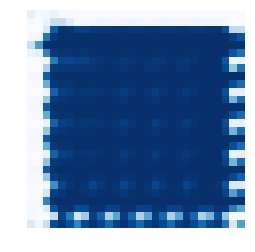

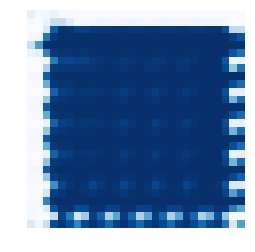

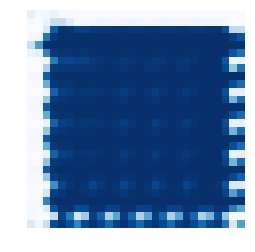

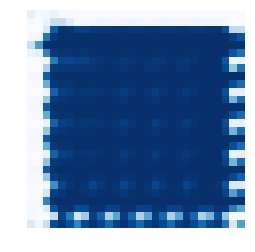

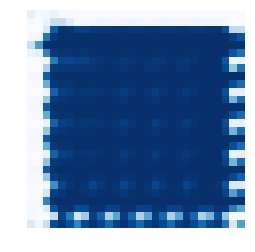

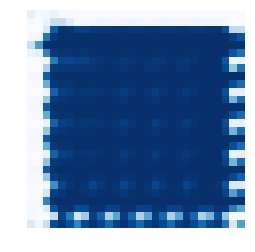

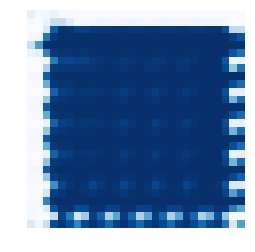

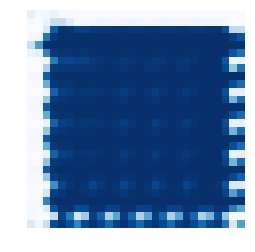

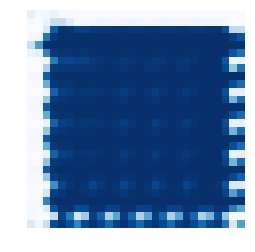

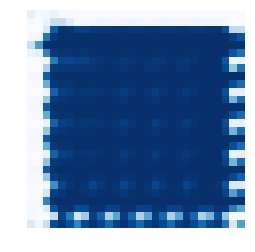

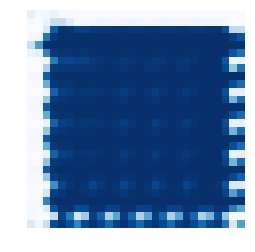

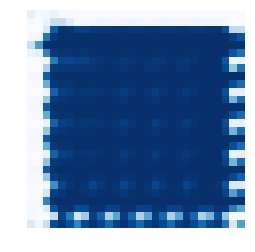

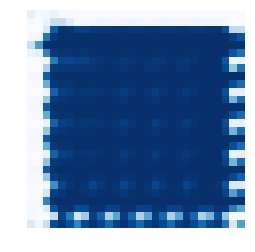

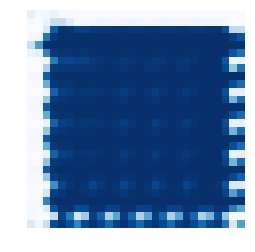

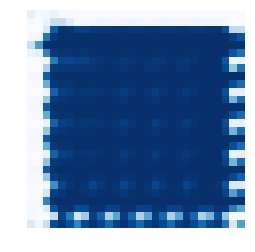

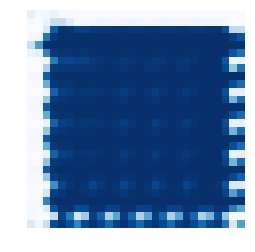

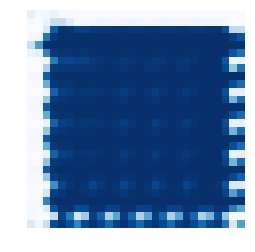

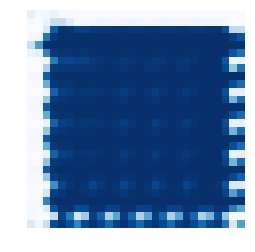

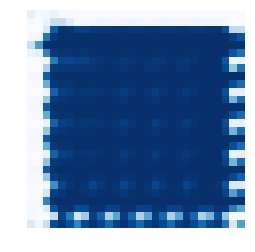

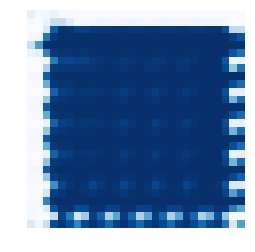

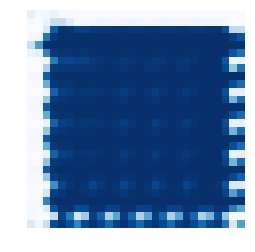

In [9]:
rand = np.random.random((1,28,28,1))

for i in range(100):
    plt.imshow(rand.squeeze(),'Blues')
    plt.axis('off')
    plt.show()
    rand = ae.predict(rand)

(-0.5, 27.5, 27.5, -0.5)

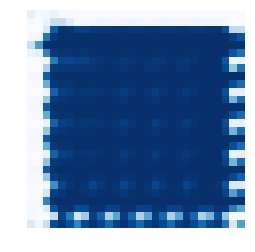

In [10]:
plt.imshow(rand.squeeze(),'Blues')
plt.axis('off')
